In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
batch_size = 32
num_classes = 5
learning_rate = 1e-4

In [3]:
from keras.datasets import cifar100
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

In [6]:
index = np.where(
    (y_train == 15) | (y_train == 30) | (y_train == 40) | (y_train == 67) | (y_train == 85)
    )

X_train = X_train[index[0]]
y_train = y_train[index[0]]

In [7]:
for i in range(2500):
    if (y_train[i] == 15):
        y_train[i] = 0
    elif (y_train[i] == 30):
        y_train[i] = 1
    elif (y_train[i] == 40):
        y_train[i] = 2
    elif (y_train[i] == 67):
        y_train[i] = 3
    elif (y_train[i] == 85):
        y_train[i] = 4

In [8]:
index = np.where(
    (y_test == 15) | (y_test == 30) | (y_test == 40) | (y_test == 67) | (y_test == 85)
    )
    
X_test = X_test[index[0]]
y_test = y_test[index[0]]

In [9]:
for i in range(500):
    if (y_test[i] == 15):
        y_test[i] = 0
    elif (y_test[i] == 30):
        y_test[i] = 1
    elif (y_test[i] == 40):
        y_test[i] = 2
    elif (y_test[i] == 67):
        y_test[i] = 3
    elif (y_test[i] == 85):
        y_test[i] = 4

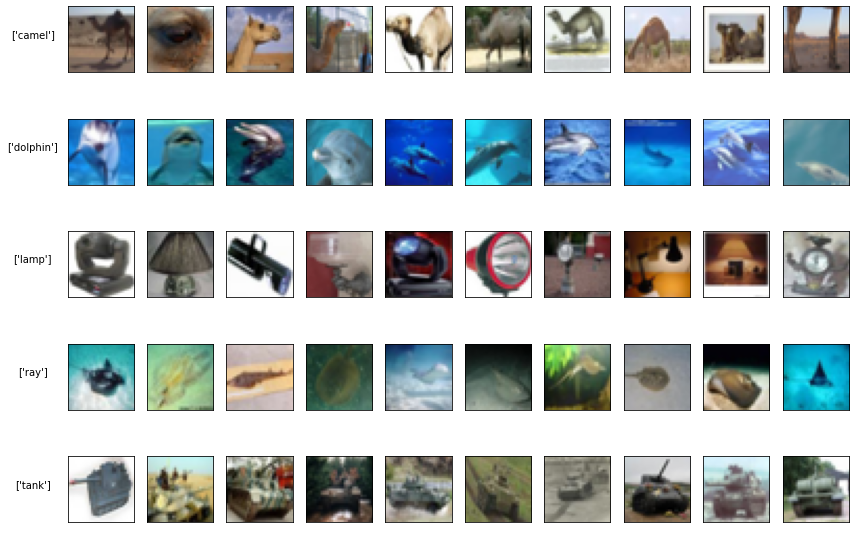

In [11]:
list_name=['camel', 'dolphin', 'lamp', 'ray', 'tank']
list_num=[0, 1, 2, 3, 4, 5]

fig, ax = plt.subplots(5, 10, figsize=(14,10))
plt.setp(ax, xticks=[], xticklabels=[],yticks=[])

for row in range(5):
    ax[row, 0].set_ylabel([list_name[row]], labelpad=35, rotation=0)
    for col in range(10):
        ax[row, col].imshow(X_train[np.where((y_train == list_num[row]))[0][col]])


In [9]:
from keras import Model
from keras.layers import BatchNormalization, Input, Conv2D, MaxPooling2D, Activation, GlobalAveragePooling2D, Dense, Dropout
from keras.optimizers import Adam

In [10]:
def build_model():
    inputs = Input(shape=(32, 32, 3))
    x = Conv2D(32, (3,3), strides=(1,1), padding="same", use_bias=False)(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x) 

    x = Conv2D(64, (3,3), strides=(1,1), padding="same", use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x) 

    x = Conv2D(128, (3,3), strides=(1,1), padding="same", use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x) 

    x = GlobalAveragePooling2D()(x)

    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)

    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs, outputs)

    return model

In [11]:
model = build_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        864       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18432     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256   

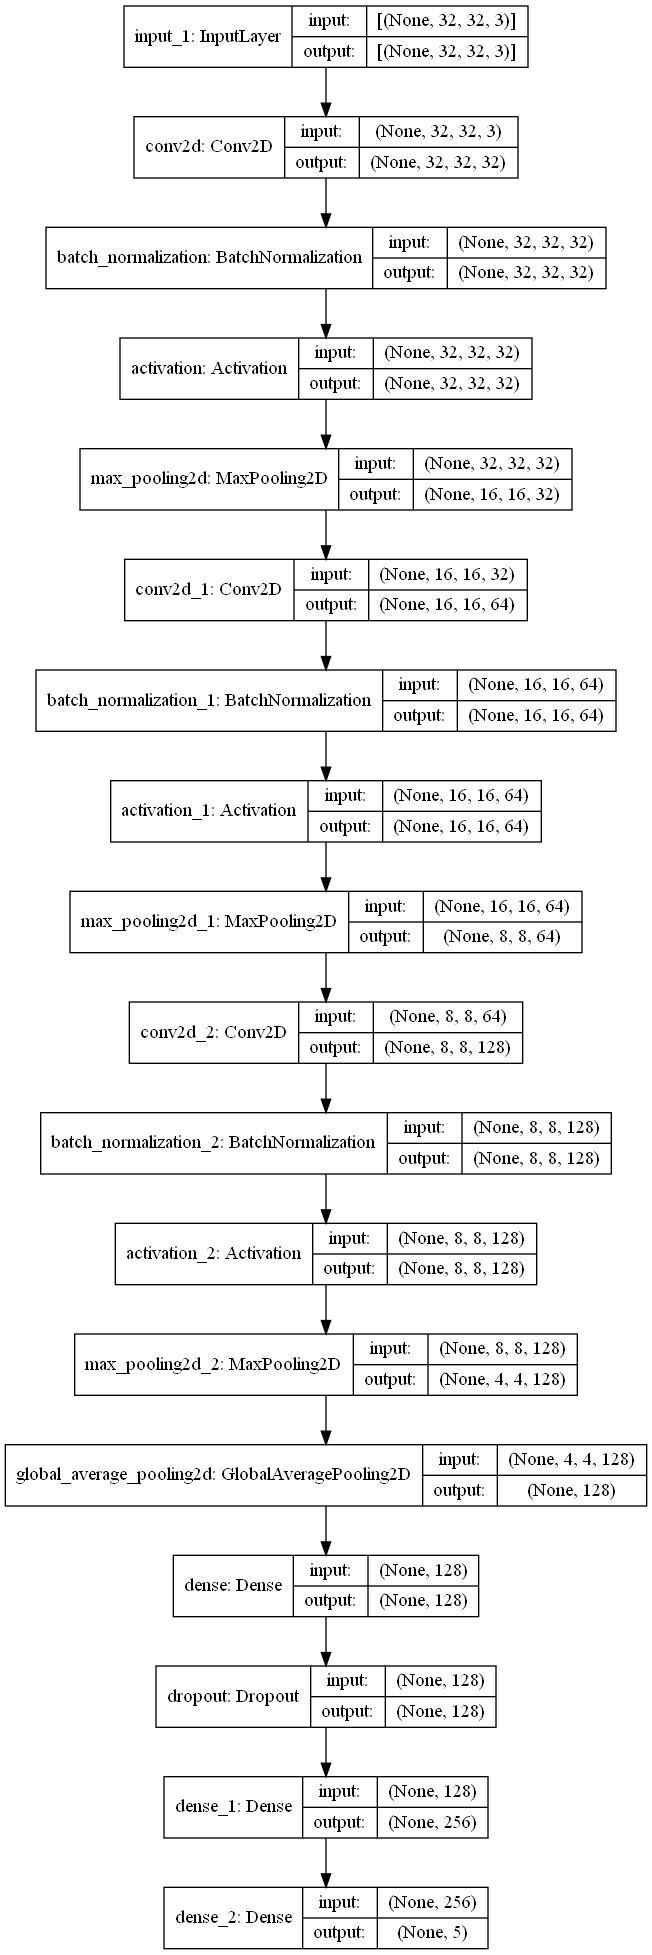

In [12]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [13]:
model.compile(
    optimizer= Adam(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

In [14]:
print(f'X_train shape >', X_train.shape)
print(f'y_train shape >', y_train.shape)
print(f'X_test shape >', X_test.shape)
print(f'y_test shape >', y_test.shape)

X_train shape > (2500, 32, 32, 3)
y_train shape > (2500, 1)
X_test shape > (500, 32, 32, 3)
y_test shape > (500, 1)


In [15]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [16]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, dtype ="uint8")
y_test = to_categorical(y_test, dtype ="uint8")

In [17]:
history = model.fit(
    X_train, y_train,
    batch_size= batch_size,
    epochs=100,
    validation_data=(X_test, y_test)
)

Epoch 1/100
79/79 [==============================] - 5s 28ms/step - loss: 1.5793 - accuracy: 0.2789 - val_loss: 1.5947 - val_accuracy: 0.2280
Epoch 2/100
79/79 [==============================] - 1s 9ms/step - loss: 1.2261 - accuracy: 0.4813 - val_loss: 1.6405 - val_accuracy: 0.2480
Epoch 3/100
79/79 [==============================] - 1s 9ms/step - loss: 1.1621 - accuracy: 0.5197 - val_loss: 1.7267 - val_accuracy: 0.2740
Epoch 4/100
79/79 [==============================] - 1s 9ms/step - loss: 1.0534 - accuracy: 0.5844 - val_loss: 1.7459 - val_accuracy: 0.3060
Epoch 5/100
79/79 [==============================] - 1s 9ms/step - loss: 0.9628 - accuracy: 0.6230 - val_loss: 1.6219 - val_accuracy: 0.3320
Epoch 6/100
79/79 [==============================] - 1s 9ms/step - loss: 0.9474 - accuracy: 0.6129 - val_loss: 1.2447 - val_accuracy: 0.4900
Epoch 7/100
79/79 [==============================] - 1s 9ms/step - loss: 0.9005 - accuracy: 0.6641 - val_loss: 0.9321 - val_accuracy: 0.6420
Epoch 8/100


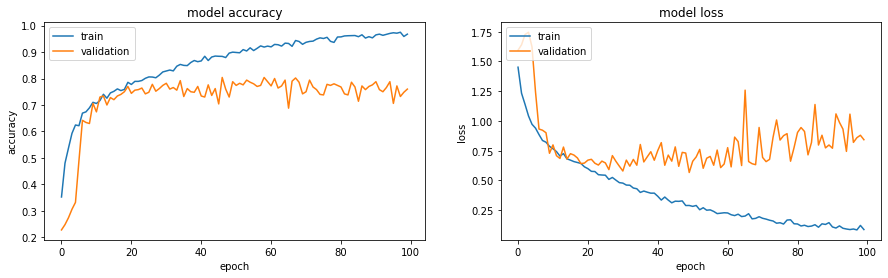

In [18]:
plt.figure(figsize=(15, 4))
plt.subplot(121),
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
cm = confusion_matrix(y_test.argmax(axis=1), model.predict(X_test).argmax(axis=1))

<AxesSubplot:>

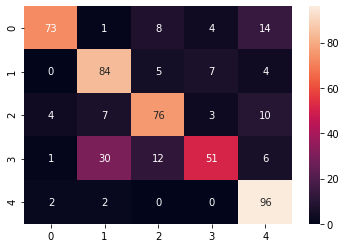

In [21]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [22]:
from keras.models import save_model, load_model
model.save('100.epoch.h5')

In [ ]:
model = load_model('100.epoch.h5')